In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G1=nx.DiGraph()

In [3]:
G1.add_nodes_from(list(range(1, 12)))

In [4]:
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

In [5]:
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1, 3, weight = 4.0)
G1.add_edge(1, 4, weight = 3.0)
G1.add_edge(1, 5, weight = 2.3)
G1.add_edge(2, 6, weight = 1.0)
G1.add_edge(3, 7, weight = 4.0)
G1.add_edge(4, 8, weight = 2.0)
G1.add_edge(5, 9, weight = 2.0)
G1.add_edge(6, 10, weight = 2.0)
G1.add_edge(7, 10, weight = 3.0)
G1.add_edge(8, 10, weight = 1.0)
G1.add_edge(9, 10, weight = 3.0)
G1.add_edge(10, 11, weight = 2.0)
G1.edges()

OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, 10), (8, 10), (9, 10), (10, 11)])

In [6]:
# set the coordinates of each node
G1.add_node(1, pos=(0,0))
G1.add_node(2, pos=(4,2))
G1.add_node(3, pos=(4,1))
G1.add_node(4, pos=(4,-1))
G1.add_node(5, pos=(4,-2))
G1.add_node(6, pos= (8,2))
G1.add_node(7, pos= (8,1))
G1.add_node(8, pos= (8,-1))
G1.add_node(9, pos= (8,-2))
G1.add_node(10, pos= (12,0))
G1.add_node(11, pos= (16,0))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G1,'pos')

task relation graph


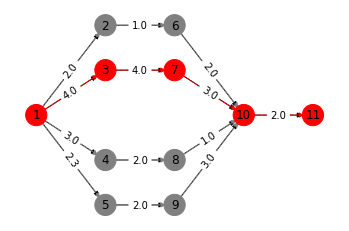

edge labels: weight
node in red: critical path


In [7]:
node_color_highlighted = 'red'
node_color = 'gray'
def draw_task_relation_graph_with_critical_path(G, cp, pos=None):
    node_color_highlighted = 'red'
    node_color = 'gray'
    edge_color_highlighted = 'red'
    edge_color = 'gray'
    metric = 'weight'
    # set the coordinates of each node
    node_pos=nx.get_node_attributes(G, 'pos') or pos
    # The edge attribute of each arcs are stored in a dictionary
    arc_weight=nx.get_edge_attributes(G,metric)
    colored_edges = list(zip(cp,cp[1:]))
    # If the node is in the shortest path, set it to red, else set it to grey color
    node_col = [node_color if not node in cp else node_color_highlighted for node in G.nodes()]
    # If the edge is in the critical path, else set it to white color
    edge_col = [edge_color if not edge in colored_edges else edge_color_highlighted for edge in G.edges()]
    # Draw the nodes
    nx.draw_networkx(G, node_pos, node_color= node_col, node_size=450)
    # Draw the node labels
    # nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
    # Draw the edges
    nx.draw_networkx_edges(G, node_pos, edge_color= edge_col, style='--')
    # Draw the edge labels
    nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
    # Remove the axis
    plt.axis('off')
    print('task relation graph')
    # Show the plot
    plt.show()
    # description
    print('edge labels: weight')
    print('node in red: critical path')    
cpath = nx.dag_longest_path(G1)
draw_task_relation_graph_with_critical_path(G1, cpath, node_pos)

In [8]:
def node_space(nleaves):
    return 1+int((nleaves-1)/2)

def prepare_caterpillar_tree(G, path):
    nb_leaves = {}
    for node in path:
        '''
        tmp = []
        for x in G1.in_edges(node):
            if x[0] not in path:
                tmp.append(x[0])
        '''        
        neighbors = set(G.neighbors(node)) #| set(tmp)
        nb_leaves[node] = neighbors - set(path)
    max_leaves = max(len(v) for v in nb_leaves.values())
    space_needed = 1 + sum(node_space(len(v)) for v in nb_leaves.values())
    return nb_leaves, max_leaves, space_needed

nb_leaves, max_leaves, space_needed = prepare_caterpillar_tree(G1, cpath)
nb_leaves, max_leaves, space_needed

({1: {2, 4, 5}, 3: set(), 7: set(), 10: set(), 11: set()}, 3, 7)

In [9]:
def count_leaves(nleaves, even):
    leaf_cnt = int(nleaves/2)
    if even:
        leaf_cnt += nleaves % 2
    return leaf_cnt

def leaf_spacing(nleaves, even):
    leaf_cnt = count_leaves(nleaves, even)
    if leaf_cnt <= 1:
        return 0
    return 1 / (leaf_cnt-1)

def position_of_caterpillar_tree(path, nb_leaves):
    xhop = 2 / (space_needed+2)
    yhop = 0.7
    pos = {}
    xcurr = -1 + xhop/4
    for node in path:
        pos[node] = (xcurr, 0)
        if len(nb_leaves[node]) > 0:
            leaves_cnt = len(nb_leaves[node])
            extra_cnt = node_space(leaves_cnt) - 1
            extra_space = xhop * extra_cnt / 2
            xcurr += extra_space
            pos[node] = (xcurr, 0)
            l0hop = 2 * extra_space * leaf_spacing(leaves_cnt, True)
            l1hop = 2 * extra_space * leaf_spacing(leaves_cnt, False)
            l0curr = xcurr - extra_space
            l1curr = xcurr - extra_space
            if l1hop == 0:
                l1curr = xcurr
            for j,leaf in enumerate(nb_leaves[node]):
                if j % 2 == 0:
                    pos[leaf] = (l0curr, yhop)
                    l0curr += l0hop
                else:
                    pos[leaf] = (l1curr, -yhop)
                    l1curr += l1hop
            yhop = -yhop
            xcurr += xhop * extra_cnt / 2
        prev_leaves = len(nb_leaves[node])
        xcurr += xhop
    return pos
pos_for_caterpillar = position_of_caterpillar_tree(cpath, nb_leaves)
pos_for_caterpillar

{1: (-0.8333333333333333, 0),
 2: (-0.9444444444444444, 0.7),
 4: (-0.8333333333333333, -0.7),
 5: (-0.7222222222222222, 0.7),
 3: (-0.4999999999999999, 0),
 7: (-0.2777777777777777, 0),
 10: (-0.05555555555555547, 0),
 11: (0.16666666666666674, 0)}

In [10]:
def remove_node_from_graph(G, s_nodes):
    G1_removed = G.copy()
    nodes = list(G.nodes())
    for x in nodes:
        if x not in s_nodes:
            G1_removed.remove_node(x)
    return G1_removed
G1_removed = remove_node_from_graph(G1, pos_for_caterpillar.keys())
G1_removed

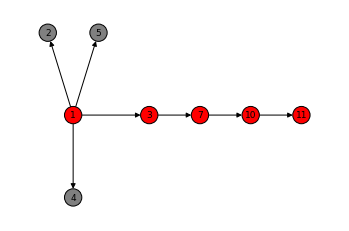

In [11]:
def draw_caterpillar(G, cpath, pos, options=None):
    node_color = 'gray'
    node_color_highlighted = 'red'
    node_col_removed = [node_color if not node in cpath else node_color_highlighted for node in G.nodes()]
    if options is None:
        options = {
            "font_size": 9,
            "node_size": 300,
            "node_color": node_col_removed,
            "edgecolors": "black",
            "linewidths": 1,
            "width": 1,
        }
    nx.draw_networkx(G, pos, **options)
    ax = plt.gca()
    ax.margins(0.10)
    plt.axis("off")
    plt.show()
draw_caterpillar(G1_removed, cpath, pos_for_caterpillar)

In [12]:
def get_leaf(G):
    return [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)==1]

def leaf_with_no_critical_path(leaves, cpath):
    for leaf_idx in range(len(leaves)):
        if leaves[leaf_idx] in cpath:
            del(leaves[leaf_idx])
    return leaves

def get_task_nodes(G, cpath):
    return leaf_with_no_critical_path(get_leaf(G), cpath)

possible_task_nodes = get_task_nodes(G1_removed, cpath)
possible_task_nodes

[2, 4, 5]

In [13]:
def task_node_plan(G, leaves, task_max_num, data_min_size):
    edges = {}
    for leaf in leaves:
        edge_data = G.in_edges(leaf, data=True)
        for u, v, attr in edge_data:
            try:
                edges[u][v] = attr
            except:
                edges[u] = {v: attr}
    new_edges = {}
    for k, v in edges.items():
        task_cnt = len(v)
        while task_cnt < task_max_num:
            break#div_ = 
task_node_plan(G1_removed, possible_task_nodes, 42, 1.0)        

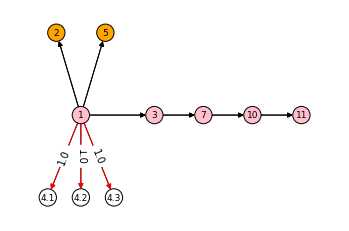

In [14]:
G1_planned = G1_removed.copy()
G1_planned.remove_node(4)
G1_planned.add_edge(1, 4.1, weight=1.0)
G1_planned.add_edge(1, 4.2, weight=1.0)
G1_planned.add_edge(1, 4.3, weight=1.0)
pos = pos_for_caterpillar
pos[4.1] = (pos[4][0] - 0.15, pos[4][1])
pos[4.2] = (pos[4][0], pos[4][1])
pos[4.3] = (pos[4][0] + 0.15, pos[4][1])
new_edges = [(1, 4.1), (1, 4.2), (1, 4.3)]
node_col_planned_ = []
for node in G1_planned.nodes():
    if node in cpath:
        new_color = 'pink'
    elif node in possible_task_nodes:
        new_color = 'orange'
    else:
        new_color = 'white'
    node_col_planned_.append(new_color)
node_col_planned_
options = {
    "font_size": 9,
    "node_size": 300,
    "node_color": node_col_planned_,
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw_networkx(G1_planned, pos, **options)
edge_col = ['black' if not edge in new_edges else 'red' for edge in G1_planned.edges()]
arc_weight = {}
for k, v in nx.get_edge_attributes(G1_planned,'weight').items():
    if k in new_edges:
        arc_weight[k] = v
nx.draw_networkx_edges(G1_planned, pos, edge_color= edge_col)#, style='--')
nx.draw_networkx_edge_labels(G1_planned, pos, edge_labels=arc_weight)

ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()